## Import packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
import numpy as np
import pickle
import math
from pandas import DataFrame, Series
from matplotlib.pyplot import cm
import openpyxl
import os
from os.path import exists as file_exists

## Find data and set parameters

In [2]:
#Data location
data_loc = 'X:\\Philip\\DLS\\'
data_file = '16.xlsx'
data_sheet = 'Sheet1'

#Zetasizer parameters
n = 1.333                                                           #refractive index
lam = 632.8E-9                                                      #wavelength
theta = 173 * np.pi/180                                             #scattering angle

q = (4*np.pi*n*np.sin(theta/2))/lam

print(data_loc+data_file+' ~~~ Sheet:'+data_sheet)

df = pd.ExcelFile(data_loc+data_file).parse(data_sheet)
taus = df['Correlation Delay Times'].str.split(' ').tolist()
correlations = df['Correlation Data'].str.split(' ').tolist()

X:\Philip\DLS\16.xlsx ~~~ Sheet:Sheet1


## Fit Correlogram

<Figure size 640x480 with 0 Axes>

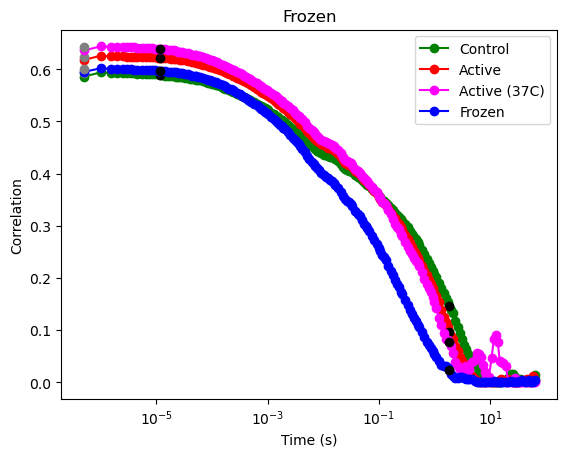

<Figure size 640x480 with 0 Axes>

In [8]:
start_lagtime = 15
end_lagtime = 150

name_list = ['Control','Active', 'Active (37C)', 'Frozen']
color_list = ['green','red','magenta','blue']

for i in range(len(taus)):
    
    lagtime = np.array([float(t)*1e-6 for t in taus[i]])
    corr = np.array([float(t) for t in correlations[i]])

    
    plt.semilogx(lagtime, corr, color=color_list[i], marker='o', label=name_list[i])
    plt.plot(lagtime[start_lagtime],corr[start_lagtime],color='black', marker='o')
    plt.plot(lagtime[end_lagtime],corr[end_lagtime],color='black', marker='o')
    
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Correlation')
    plt.title(name_list[i])
    
    intercept = corr[4:8].mean()
    plt.plot(0.0000005,intercept,color='grey', marker='o')
plt.figure()

## Generate MSDs

C:\Users\pneill\AppData\Local\Temp\ipykernel_20316\458982045.py:13: RuntimeWarning: divide by zero encountered in log
  msd = np.log(g1)*6*(-1./(q*q))


freq limits about:  86956.52173913043
freq limits about:  0.5434782608695653


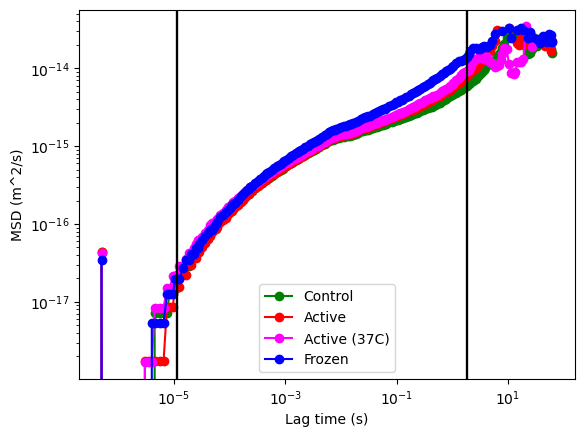

<Figure size 640x480 with 0 Axes>

In [34]:
final_lags = {}
final_msds = {}

for i in range(len(taus)):
    
    lagtime = np.array([float(t)*1e-6 for t in taus[i]])
    corr = np.array([float(t) for t in correlations[i]])

    intercept = corr[4:8].mean()

    g1 = np.sqrt(corr / (intercept))

    msd = np.log(g1)*6*(-1./(q*q))

    plt.loglog(lagtime, msd, color=color_list[i], marker='o', label=name_list[i])
    plt.axvline(lagtime[start_lagtime], color='black')
    plt.axvline(lagtime[end_lagtime], color='black')
    
    name = name_list[i]
    
    plt.legend()
    plt.xlabel('Lag time (s)')
    plt.ylabel('MSD (m^2/s)')
    
    final_lags = lagtime[start_lagtime:end_lagtime]
    final_msds[name] = msd[start_lagtime:end_lagtime]
        
df2 = pd.DataFrame(final_lags)
df3 = pd.DataFrame(final_msds)
df4 = [df2,df3]
df4 = pd.concat(df4, axis=1)

df4.to_csv(data_loc+'\\df.csv', index=False)
#df3.to_csv(data_loc+'\\df.csv', index=False, mode='a')

plt.figure()
print("freq limits about: ", 1/(lagtime[start_lagtime]))
print("freq limits about: ", 1/(lagtime[end_lagtime]))

In [42]:
lagtimes = [1,0,2]
msdeez = [3,3,3]
MSD_all = np.array([lagtimes, msdeez])

print(MSD_all)

tau=MSD_all[1,:]

print(tau)

[[1 0 2]
 [3 3 3]]
[3 3 3]


In [36]:
np.load(lagtimes, msds)

radius=(1*10^-6)
temperature=295.15
pi = np.pi

lambda=(1.38064852*(10^-23)*temperature)/(pi*radius);

AR=20 #Aquisition rate
AT=50 #Recorded time
col=2 #MSD column number

tau=MSD_all(:,1)
%NMSD_smooth=5;
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%Logarthmic binning
Ceil_FN=1.45; %Check 1
%AA=MSD_all(1:(AR*AT),col)*10^-12;
AA=MSD_all(1:end,col)*10^-12;
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%Filtering MSD
% order=3;
% framelen=301;
% AA= sgolayfilt(AA,order,framelen);
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%MSD smoothing
MSD_smooth=1;
AA=smoothdata(AA,'gauss',MSD_smooth);
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
subplot(3,1,1);
%loglog(tau,MSD_all(1:(AR*AT),col)*10^-12,'go');
hold on
%loglog(tau,AA+.1*10^-12,'ko');
hold on;
% jj=2;
% bb2(1,1)=tau(1);
% bb2(1,2)=AA(1);
% bb=zeros(1,(numel(tau)));
% for pp=2:numel(tau)
% 
%     bb(pp)=ceil(Ceil_FN^(pp));%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%     if bb(pp)~=bb(pp-1)
%     if bb(pp)<=numel(tau)
%         bb2(jj,1)=bb(pp)/AR;
%         bb2(jj,2)=AA(bb(pp));
%          jj=jj+1;
%     end
%     end
%     
% end
bb2=MSD_all;
%loglog(bb1(:,1),bb1(:,2),'ko');
hold on    
%subplot(2,1,1);
%bb1(:,2)=smoothdata(bb1(:,2),'gaussian',50);
%plot(bb1(:,1),bb1(:,2),'ro');
% hold on
%bb2(:,2)=smoothdata(bb2(:,2),'gaussian',NMSD_smooth);%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%loglog(bb2(:,1),bb2(:,2),'bo');
loglog(bb2(:,1),bb2(:,2),'bo');
hold on

fs=1*10^3;%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
xx(:)=bb2(2,1):1/fs:bb2(end,1);%%%X axis after interpolation
cs(:)=pchip(bb2(2:end,1),bb2(2:end,2),xx);%%%Y axis after interpolation
%cs=smoothdata(cs,'gauss',1000);%%%Opional smoothing
loglog(xx,cs,'b-');
ylabel('\pi(\tau)','fontweight','bold','fontsize',16)%%%modified MSD
xlabel('\tau (sec)','fontweight','bold','fontsize',16)
hold on
jj=2;
%bb3(1,2)=1/AR;
bb3(1,1)=xx(1);
bb3(1,2)=cs(1);
clear bb;
bb=zeros(1,(numel(xx)));
for pp=2:numel(xx)

    bb(pp)=ceil(1.015^(pp));
    if bb(pp)~=bb(pp-1)
    if bb(pp)<=numel(xx)
         %bb3(jj,1)=(1/AR)+((bb(pp)-1)/fs);
        bb3(jj,1)=(xx(1))+((bb(pp)-1)/fs);
        bb3(jj,2)=cs(bb(pp));
         jj=jj+1;
    end
    end
    
end
loglog(bb3(:,1),bb3(:,2),'ro');
%ginf=((bb2(end,2)-bb2(end-3,2))/(bb2(end,1)-bb2(end-3,1)));
%ginf=((bb3(end,2)-bb3(end-9,2))/(bb3(end,1)-bb3(end-9,1)));
ginf=((bb3(end,2)-bb3(1,2))/(bb3(end,1)-bb3(1,1)));
%ginf=10^-12;
total_points = 1000
one_processor = total_points/4
omega=logspace(-.4,5.1,total_points);%%%%Choose your x axis range
ssss = 500


% 
% % %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Start of moduli
%%%%%%%%%%%% computing
parfor mv =1:4
    if mv==1
        cs1=cs;
        xx1=xx;
        g1=zeros(1,one_processor);
        omega1=omega(1:one_processor);        
        g1inf=ginf;
            
        for ss1=1:numel(omega1)
                disp(num2str(ss1));
            I1=zeros(1,(numel(xx1)-1));
            for k1=2:numel(xx1)
                I1(k1-1)=((cs1(k1)-cs1(k1-1))/(xx1(k1)-xx1(k1-1)))*(exp(-1i*omega1(ss1)*xx1(k1-1))-exp(-1i*omega1(ss1)*xx1(k1)));
            end
            g1(ss1)=(1i*omega1(ss1)*0)+((1-(exp(-1i*omega1(ss1)*xx1(1))))*((cs1(1)-0)/xx1(1)))+(g1inf*exp(-1i*omega1(ss1)*xx1(end)))+sum(I1);
            g1(ss1)=-g1(ss1)/(omega1(ss1)^2);
        end
        m=matfile(sprintf('output%d.mat', mv),'writable',true);
        m.g_1=g1;
        m.omega1=omega1;
    end
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    if mv==2
        cs2=cs;
        xx2=xx;
        g2=zeros(1,250);
        omega2=omega(one_processor+1:one_processor*2);        
        g2inf=ginf;
        for ss2=1:numel(omega2)
            I2=zeros(1,(numel(xx2)-1));
            for k2=2:numel(xx2)
                I2(k2-1)=((cs2(k2)-cs2(k2-1))/(xx2(k2)-xx2(k2-1)))*(exp(-1i*omega2(ss2)*xx2(k2-1))-exp(-1i*omega2(ss2)*xx2(k2)));
            end
            g2(ss2)=(1i*omega2(ss2)*0)+((1-(exp(-1i*omega2(ss2)*xx2(1))))*((cs2(1)-0)/xx2(1)))+(g2inf*exp(-1i*omega2(ss2)*xx2(end)))+sum(I2);
            g2(ss2)=-g2(ss2)/(omega2(ss2)^2);
        end
        m=matfile(sprintf('output%d.mat', mv),'writable',true);
        m.g_2=g2;
        m.omega2=omega2;
    end
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    if mv==3
        cs3=cs;
        xx3=xx;
        g3=zeros(1,one_processor);
        omega3=omega(one_processor*2+1:one_processor*3);        
        g3inf=ginf;
        for ss3=1:numel(omega3)
            I3=zeros(1,(numel(xx3)-1));
            for k3=2:numel(xx3)
                I3(k3-1)=((cs3(k3)-cs3(k3-1))/(xx3(k3)-xx3(k3-1)))*(exp(-1i*omega3(ss3)*xx3(k3-1))-exp(-1i*omega3(ss3)*xx3(k3)));
            end
            g3(ss3)=(1i*omega3(ss3)*0)+((1-(exp(-1i*omega3(ss3)*xx3(1))))*((cs3(1)-0)/xx3(1)))+(g3inf*exp(-1i*omega3(ss3)*xx3(end)))+sum(I3);
            g3(ss3)=-g3(ss3)/(omega3(ss3)^2);
        end
        m=matfile(sprintf('output%d.mat', mv),'writable',true);
        m.g_3=g3;
        m.omega3=omega3;
    end
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    if mv==4
        cs4=cs;
        xx4=xx;
        g4=zeros(1,one_processor);
        omega4=omega(one_processor*3+1:one_processor*4);        
        g4inf=ginf;
        for ss4=1:numel(omega4)
            I4=zeros(1,(numel(xx4)-1));
            for k4=2:numel(xx4)
                I4(k4-1)=((cs4(k4)-cs4(k4-1))/(xx4(k4)-xx4(k4-1)))*(exp(-1i*omega4(ss4)*xx4(k4-1))-exp(-1i*omega4(ss4)*xx4(k4)));
            end
            g4(ss4)=(1i*omega4(ss4)*0)+((1-(exp(-1i*omega4(ss4)*xx4(1))))*((cs4(1)-0)/xx4(1)))+(g4inf*exp(-1i*omega4(ss4)*xx4(end)))+sum(I4);
            g4(ss4)=-g4(ss4)/(omega4(ss4)^2);
        end
        m=matfile(sprintf('output%d.mat', mv),'writable',true);
        m.g_4=g4;
        m.omega4=omega4;
    end
end
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
load output1.mat;
load output2.mat;
load output3.mat;
load output4.mat;

g_final=horzcat(g_1,g_2,g_3,g_4);
for q=1:numel(omega)
    gg(q)=((1/(1i*omega(q)*g_final(q))));
end
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%End of computing moduli values
%subplot(3,1,2);
% real_smooth=smoothdata(real(gg),'gaussian',100);
% imag_smooth=smoothdata(imag(gg),'gaussian',100);
% loglog(omega,real(gg),'ro-');
% loglog(omega,imag(gg),'b*-');
new1=real(gg);
new2=imag(gg);
Elastic_modulus=(new1*lambda)';
Viscous_modulus=(new2*lambda)';
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%Filtering and smoothing moduli values
order=3;
framelen=11;
Elastic_modulus= sgolayfilt(Elastic_modulus,order,framelen);
Viscous_modulus= sgolayfilt(Viscous_modulus,order,framelen);

Elastic_modulus=smoothdata(Elastic_modulus,'gauss',ssss);
Viscous_modulus=smoothdata(Viscous_modulus,'gauss',ssss);
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for i=1:numel(omega)
Complex_viscosity(i,1)=(sqrt(Elastic_modulus(i)^2+Viscous_modulus(i)^2))/omega(i);
end
%Zero_shear_viscosity=mean(Complex_viscosity(1:56));
%Zero_shear_viscosity_stderror=std(Complex_viscosity(1:56))/sqrt(length(Complex_viscosity(1:56)));
omega=omega';
subplot(3,1,2);
loglog(omega,Elastic_modulus,'ro-');
hold on;
loglog(omega,Viscous_modulus,'b*-');
subplot(3,1,3);
loglog(omega,Complex_viscosity,'ro-');


clear bb cs xx;
Final_matrix=[omega,Elastic_modulus,Viscous_modulus,Complex_viscosity];
toc


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 83)